In [15]:
# import required modules 
import numpy as np
from tensorflow.keras.datasets import mnist
from pylab import plt
plt.style.use ('seaborn')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

import time
from tensorflow.keras.callbacks import TensorBoard

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [16]:
# load mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (f'The train dataset has shape {X_train.shape} and the labels shape is: {y_train.shape}')
print (f'The test dataset has shape {X_test.shape} and the labels shape is: {y_test.shape}')

The train dataset has shape (60000, 28, 28) and the labels shape is: (60000,)
The test dataset has shape (10000, 28, 28) and the labels shape is: (10000,)


In [17]:
# Some preprocess on data:

X_train= X_train.reshape ((X_train.shape[0], -1))  ### flatten the train inputs to be 1D arrays
X_test= X_test.reshape ((X_test.shape[0], -1))     ### flatten the test inputs to be 1D arrays

print (X_train.shape, X_test.shape)

y_train= to_categorical(y_train, num_classes=10, dtype="int")   ###  One-hot encode the labels to make them real classes, due to do classification
y_test= to_categorical(y_test, num_classes=10, dtype="int")     ###  One-hot encode the labels to make them real classes, due to do classification

# normalize the inputs
X_train= X_train / 255
X_test= X_test / 255

(60000, 784) (10000, 784)


Now let's try some different models to see which one gives us the best result.

(here we change some parameters in order to have the best combination of different parameters at last)

Epoch 1/20
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3318 - accuracy: 0.6009 - val_loss: 0.7163 - val_accuracy: 0.8038
Epoch 2/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6191 - accuracy: 0.8239 - val_loss: 0.5334 - val_accuracy: 0.8461
Epoch 3/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5099 - accuracy: 0.8556 - val_loss: 0.4629 - val_accuracy: 0.8648
Epoch 4/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4599 - accuracy: 0.8710 - val_loss: 0.4267 - val_accuracy: 0.8742
Epoch 5/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4270 - accuracy: 0.8801 - val_loss: 0.3992 - val_accuracy: 0.8832
Epoch 6/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4025 - accuracy: 0.8881 - val_loss: 0.3805 - val_accuracy: 0.8903
Epoch 7/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3835 - accuracy: 0.8930 - val_loss: 0.3658 - val_accuracy:

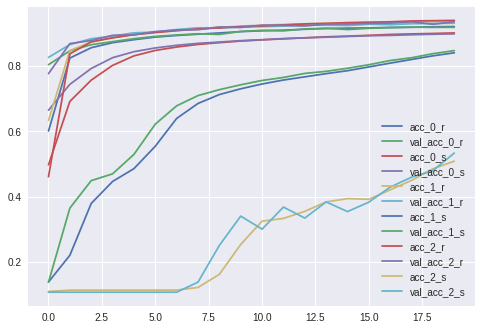

In [19]:
activations= ['relu','sigmoid']
N_hidden= [0, 1, 2]
 
for i in range (len (N_hidden)):
    for acv in activations:
        NAME= f'MNIST_{N_hidden[i]}_layers_{acv}'
        model= Sequential ()

        # INputs
        model.add (Dense (10, input_shape= (X_train.shape[1], )))
        model.add (Activation (acv))
        
        # HIDDEN layers
        for _ in range (N_hidden[i]):
            model.add (Dense (10))
            model.add (Activation (acv))

        # OUTput
        model.add (Dense (10))
        model.add (Activation('softmax'))


        sgd = optimizers.SGD(lr = 0.01)

        model.compile(optimizer = sgd , loss = 'categorical_crossentropy', metrics = ['accuracy'])
        history = model.fit (X_train, y_train, epochs= 20, validation_split= 0.3, verbose= 1, callbacks= [tensorboard_callback])
        print(NAME)
        print (f'Model accuracy for {acv} is: {model.evaluate (X_test, y_test, verbose= 0) [1]}')

        plt.plot(history.history ['accuracy'], label= 'acc' + f'_{i}_{acv[0]}')
        plt.plot(history.history ['val_accuracy'], label= 'val_acc' + f'_{i}_{acv[0]}')
        plt.legend ()

lets do the previous part with changing the optimizers 

Epoch 1/20
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1888 - accuracy: 0.6619 - val_loss: 0.5711 - val_accuracy: 0.8503
Epoch 2/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4844 - accuracy: 0.8665 - val_loss: 0.4126 - val_accuracy: 0.8848
Epoch 3/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3911 - accuracy: 0.8905 - val_loss: 0.3629 - val_accuracy: 0.8981
Epoch 4/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3511 - accuracy: 0.9009 - val_loss: 0.3387 - val_accuracy: 0.9023
Epoch 5/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3292 - accuracy: 0.9059 - val_loss: 0.3221 - val_accuracy: 0.9074
Epoch 6/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3146 - accuracy: 0.9097 - val_loss: 0.3138 - val_accuracy: 0.9089
Epoch 7/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3043 - accuracy: 0.9130 - val_loss: 0.3069 - val_accuracy:

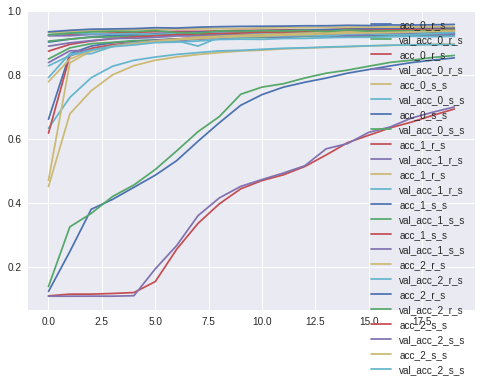

In [20]:
activations= ['relu','sigmoid']
sgd = optimizers.SGD(lr = 0.01)
optimizer = [sgd , 'adam']
N_hidden= [0, 1, 2]
opt_name = 'r'
 
for i in range (len (N_hidden)):
    for acv in activations:
        NAME= f'MNIST_{N_hidden[i]}_layers_{acv}'
        model= Sequential ()

        # INputs
        model.add (Dense (10, input_shape= (X_train.shape[1], )))
        model.add (Activation (acv))
        
        # HIDDEN layers
        for _ in range (N_hidden[i]):
            model.add (Dense (10))
            model.add (Activation (acv))

        # OUTput
        model.add (Dense (10))
        model.add (Activation('softmax'))


        sgd = optimizers.SGD(lr = 0.01)

        for opt in optimizer:
            model.compile(optimizer = opt , loss = 'categorical_crossentropy', metrics = ['accuracy'])
            history = model.fit (X_train, y_train, epochs= 20, validation_split= 0.3, verbose= 1)
            print(NAME + f'_optimizer_{opt}')
            print (f'Model accuracy for {acv} is: {model.evaluate (X_test, y_test, verbose= 0) [1]}')

            if opt == 'relu':
                opt_name = 'r'
            else:
                opt_name = 's'
            plt.plot(history.history ['accuracy'], label= 'acc' + f'_{i}_{acv[0]}_{opt_name}')
            plt.plot(history.history ['val_accuracy'], label= 'val_acc' + f'_{i}_{acv[0]}_{opt_name}')
            plt.legend ( loc='upper right')

So we can see that the adam optimizer worked dramaticly better for us than sgd.

we can also see that there is a noticable difference between the results from the models which worked with relu and the ones which worked with sigmoid. relu worked better.

(there were no significant differences between 

# **the chosen configuration of parameters is :**

1.   hidden layers : 0 (not sure why)
2.   activation : relu
3.   optimizer : adam


we will create a model with these chosen parameters

In [21]:
model= Sequential ()

# INputs and first HIDDEN layer
model.add (Dense (512, input_shape= (X_train.shape[1], )))
model.add (Activation ('relu'))

# HIDDEN layers
model.add (Dense (256))
model.add (Dense (128))

# OUTput
model.add (Dense (10))
model.add (Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
history1 = model.fit (X_train, y_train, epochs= 50, validation_split= 0.3, verbose= 1, callbacks= [tensorboard_callback])
print (f'Model accuracy for {acv} is: {model.evaluate (X_test, y_test, verbose= 0) [1]}')


Epoch 1/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2207 - accuracy: 0.9336 - val_loss: 0.1484 - val_accuracy: 0.9573
Epoch 2/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1073 - accuracy: 0.9673 - val_loss: 0.1273 - val_accuracy: 0.9655
Epoch 3/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0783 - accuracy: 0.9756 - val_loss: 0.1201 - val_accuracy: 0.9675
Epoch 4/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0597 - accuracy: 0.9821 - val_loss: 0.1326 - val_accuracy: 0.9670
Epoch 5/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0493 - accuracy: 0.9854 - val_loss: 0.1439 - val_accuracy: 0.9685
Epoch 6/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.1154 - val_accuracy: 0.9719
Epoch 7/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.1426 - val_accuracy:

**Dropout**

lets see how dropout affects it...

In [22]:
model= Sequential ()

# INputs and first HIDDEN layer
model.add (Dense (512, input_shape= (X_train.shape[1], )))
model.add (Activation ('relu'))
model.add (Dropout (0.2))           

# HIDDEN layers
model.add (Dense (256))
model.add (Activation ('relu'))
model.add (Dropout (0.2))

# OUTput
model.add (Dense (10))
model.add (Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
history2 = model.fit (X_train, y_train, epochs= 50, validation_split= 0.3, verbose= 1, callbacks= [tensorboard_callback])
print (f'Model accuracy for {acv} is: {model.evaluate (X_test, y_test, verbose= 0) [1]}')


Epoch 1/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.2537 - accuracy: 0.9227 - val_loss: 0.1370 - val_accuracy: 0.9577
Epoch 2/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1151 - accuracy: 0.9642 - val_loss: 0.1044 - val_accuracy: 0.9689
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0869 - accuracy: 0.9725 - val_loss: 0.1037 - val_accuracy: 0.9697
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0667 - accuracy: 0.9794 - val_loss: 0.1121 - val_accuracy: 0.9686
Epoch 5/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0624 - accuracy: 0.9800 - val_loss: 0.0985 - val_accuracy: 0.9725
Epoch 6/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0519 - accuracy: 0.9837 - val_loss: 0.0992 - val_accuracy: 0.9735
Epoch 7/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.1184 - val_accuracy:

drawing both models learning curves to see the difference between them

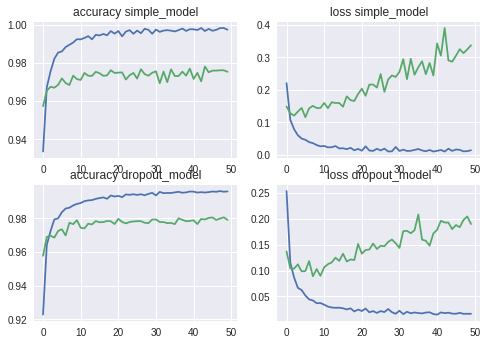

In [23]:
import matplotlib.pyplot as PLT

fig, ax = PLT.subplots(2, 2)

#visualising the acc and loss of our simple model
ax[0, 0].plot(history1.history ['accuracy'] ) #row=0, col=0
ax[0, 0].plot(history1.history ['val_accuracy'])
ax[0, 0].set_title('accuracy simple_model')
ax[0, 1].plot(history1.history ['loss']) #row=0, col=1
ax[0, 1].plot(history1.history ['val_loss'])
ax[0, 1].set_title('loss simple_model')

#visualising the acc and loss of the model that we applyed to
ax[1, 0].plot(history2.history ['accuracy'] ) #row=0, col=0
ax[1, 0].plot(history2.history ['val_accuracy'])
ax[1, 0].set_title('accuracy dropout_model')
ax[1, 1].plot(history2.history ['loss']) #row=0, col=1
ax[1, 1].plot(history2.history ['val_loss'])
ax[1, 1].set_title('loss dropout_model')

PLT.show()

# **conclusion** 

the dropout_model has a better `accuracy` and less `loss` (in high epoches) 

on the other hand the dropout_model runs in less `time`

Tamrin Data science 

by : Ariamehr Maleki